In [3]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

# Optional: support for 3D plotting in the NB
%matplotlib widget
# %matplotlib inline
# turn this off, if you don't need it

7


/home/neaf2080/.pyenv/versions/3.8.18/envs/webots_env/lib/python3.8/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


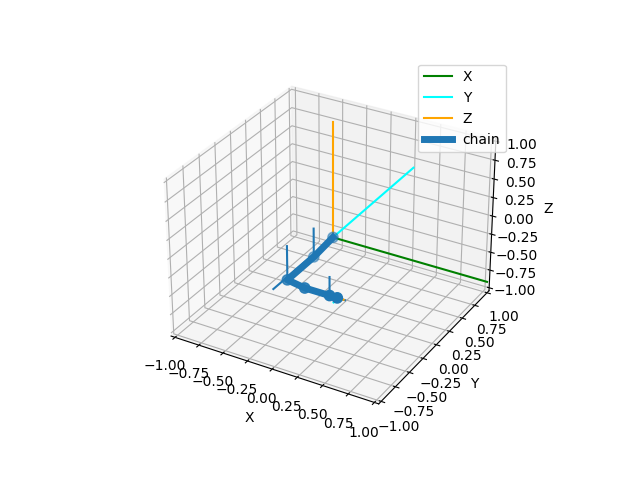

In [4]:
DRV_chain = Chain.from_urdf_file("../resources/DRV90.urdf")
# DRV_chain = Chain.from_urdf_file("../resources/DRV90ASS_test.urdf")

print(len(DRV_chain))
# Let's how it looks without kinematics first
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
DRV_chain.plot([0] * (len(DRV_chain)), ax)
ax.legend()

In [5]:
real_frame = DRV_chain.forward_kinematics([0] * (len(DRV_chain)))
t = [0]
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], t))




Computed position vector : [ 5.33995489e-01 -8.54000898e-01 -7.02316352e-06], original position vector : [0]


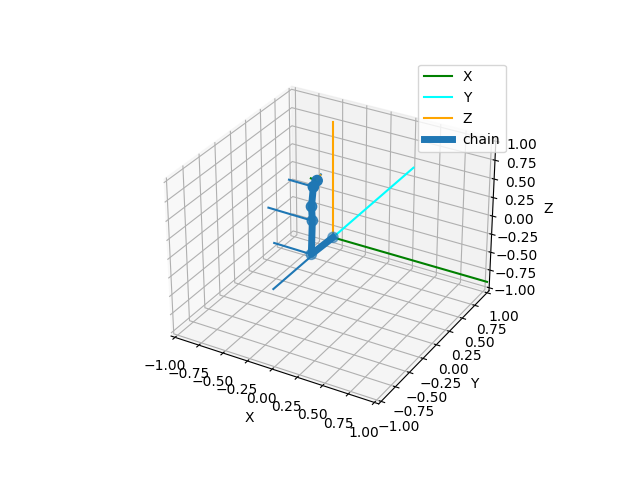

In [6]:

# target_position = [0.25, 0, 0.45]
target_position = [0.14984617, -0.10076069,  10]
target_orientation = [0, 1, 0]

ik = DRV_chain.inverse_kinematics(target_position, 
                                  target_orientation, 
                                  orientation_mode="Z")

# ik = DRV_chain.inverse_kinematics(target_position)

fig, ax = plot.init_3d_figure();
DRV_chain.plot(ik, ax)
ax.legend()

In [7]:
def get_chain_bounds(chain):
    links_bounds_angle = []
    for i in range(len(chain)):
        links_bounds_angle.append(np.asarray(chain.links[i].bounds) * 180.0 / np.pi)

    return links_bounds_angle


links_bounds_angle = get_chain_bounds(DRV_chain)
links_bounds_angle

[array([-inf,  inf]),
 array([-170.00230739,  170.00230739]),
 array([-105.00024554,  135.00031569]),
 array([-204.99856952,   60.00014031]),
 array([-189.99853444,  189.99853444]),
 array([-120.00028061,  120.00028061]),
 array([-360.00084184,  360.00084184])]

In [14]:
a = 360 * np.pi / 180

a / np.pi 

2.0

In [9]:
def check_ik_in_boundarys(bounds, ik):
    """
    bounds and ik should be same type (angle or radian)
    """
    is_ok = True
    assert len(bounds) == len(ik), "len(bounds) should == len(ik)"
    for i, bound in enumerate(bounds):
        # print(bound)
        if bound[0] < ik[i] < bound[1]:
            print(i, "ok")
        else:
            print(i, "no")
            is_ok = False
            break
    return is_ok





links_bounds_angle

ik = [0, 170, 135, 61, 0, 0, 0]

check_ik_in_boundarys(links_bounds_angle, ik)


0 ok
1 ok
2 ok
3 no


False

In [10]:
3<4<5

True

In [11]:
np.asarray(DRV_chain.links[1].bounds) * 2


array([-5.9342,  5.9342])

SyntaxError: invalid syntax (1523926194.py, line 1)

In [ ]:
a = [100, 200, 300]
for i in enumerate(a):
    print(i)

(0, 100)
(1, 200)
(2, 300)


In [19]:
b = np.asarray((-180, 180))
b+ 5

array([-175,  185])

In [21]:
def restrict_bound(bound, num):
    result = [None, None]
    result[0] = bound[0] + num
    result[1] = bound[1] - num

    return result


restrict_bound(b, 5)

[-175, 175]